# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [2]:
raw_data = pd.read_csv('../DAT-NYC-9-27/projects/unit-projects/project-2/assets/admissions.csv')
admissions_data = raw_data.dropna()
print admissions_data.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### What are the predictors and dependent variable ?

The predictors are 'gre','gpa', and 'prestige'. The dependent variable is 'admit'.

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

I hypothesize that 'gre','gpa', and 'prestige' all have a correlation with 'admit'. Specifically, as 'gre' and 'gpa' increase, the probability of admit increases. While as the number for prestige increases, the probability of being admitted decreases. 

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [3]:
admissions_data.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


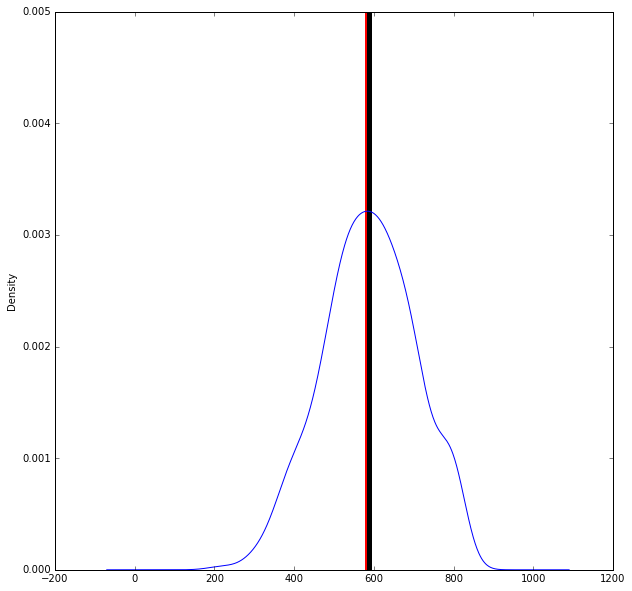

In [4]:
admissions_data['gre'].plot(kind="density",
              figsize=(10,10), ylim=(0,0.005))

plt.vlines(admissions_data['gre'].mean(),     
           ymin=0, 
           ymax=0.005,
           linewidth=5.0)

plt.vlines(admissions_data['gre'].median(),   
           ymin=0, 
           ymax=0.005, 
           linewidth=2.0,
           color="red")

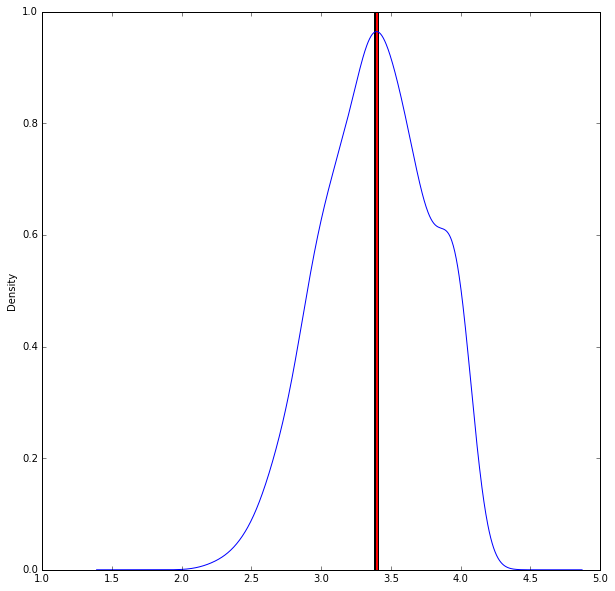

In [5]:
admissions_data['gpa'].plot(kind="density",
              figsize=(10,10), ylim=(0,1.0))

plt.vlines(admissions_data['gpa'].mean(),     
           ymin=0, 
           ymax=1.0,
           linewidth=5.0)

plt.vlines(admissions_data['gpa'].median(),   
           ymin=0, 
           ymax=1.0, 
           linewidth=2.0,
           color="red")

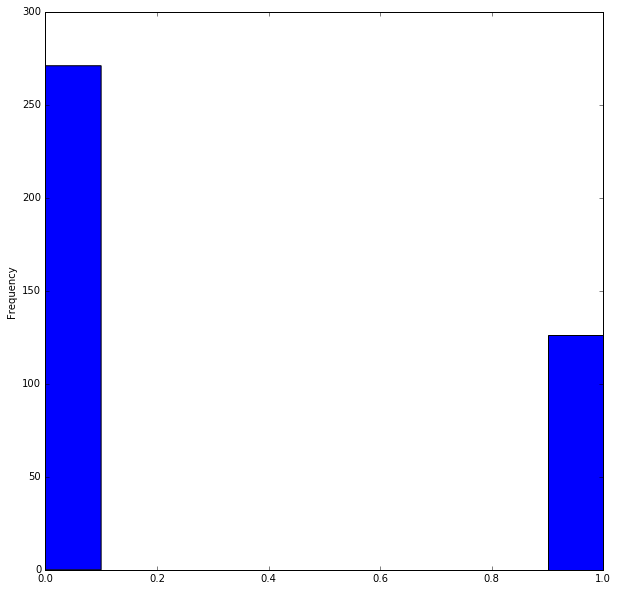

In [6]:
admissions_data['admit'].plot(kind="hist",
              figsize=(10,10), ylim=(0,300))

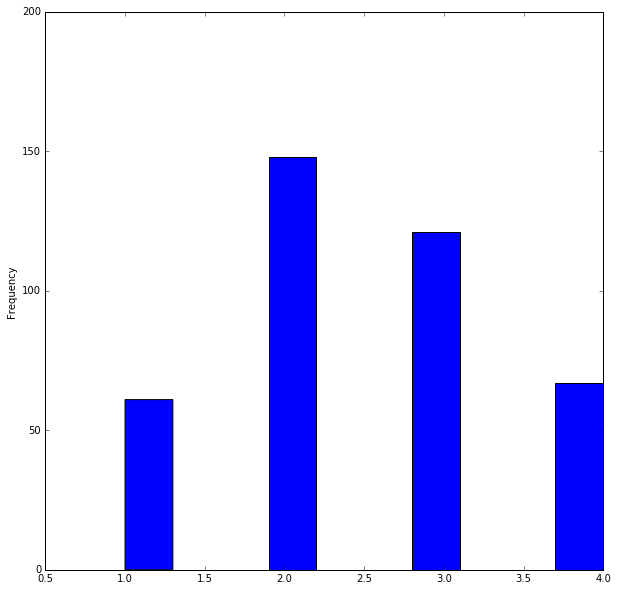

In [7]:
admissions_data['prestige'].plot(kind="hist",
              figsize=(10,10), ylim=(0,200))

### FInd the correlation of each feature with admission

In [8]:
admissions_data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


Correlations with 'admit':
* gre has a positive correlation of 0.18.
* gpa has a positive correlation of 0.17.
* prestige has a negative correlation of -0.24.


### How do you deal with the prestige feature?


Because the prestige feature is categorical, we should create dummy columns to train any model.In order to avoid multicollinearity, we need to exclude one of the prestige classes. We need to exclude the prestige class with the least amount of observations, which is 1 in this case.

In [11]:
admissions_data.prestige.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [19]:
prestige_dummies = pd.get_dummies(admissions_data.prestige)
prestige_dummies=prestige_dummies.iloc[:,1:5]
prestige_dummies.head()

,2.0,3.0,4.0
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
admissions_data[['']]

### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [31]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
data = admissions_data.join([prestige_dummies])
print data.head()
model = lm.fit(data[['gre','gpa',2,3,4]],data['admit'])

   admit    gre   gpa  prestige  2.0  3.0  4.0
0      0  380.0  3.61       3.0  0.0  1.0  0.0
1      1  660.0  3.67       3.0  0.0  1.0  0.0
2      1  800.0  4.00       1.0  0.0  0.0  0.0
3      1  640.0  3.19       4.0  0.0  0.0  1.0
4      0  520.0  2.93       4.0  0.0  0.0  1.0


In [34]:
print model.coef_
print model.intercept_

[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]
[-1.81701706]


In [39]:
parameters=model.get_params()
parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
from sklearn import grid_search, cross_validation
from sklearn.metrics import roc_curve, roc_auc_score


In [59]:

feature_set = data[['gre','gpa',2,3,4]]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, data.admit)
gs.grid_scores_


/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.67212, std: 0.09894, params: {'C': 1, 'class_weight': None},
 mean: 0.67262, std: 0.10052, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.67495, std: 0.09944, params: {'C': 2, 'class_weight': None},
 mean: 0.67562, std: 0.09866, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.67631, std: 0.09627, params: {'C': 3, 'class_weight': None},
 mean: 0.67582, std: 0.09432, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.67458, std: 0.09600, params: {'C': 4, 'class_weight': None},
 mean: 0.67354, std: 0.09211, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.67393, std: 0.09488, params: {'C': 5, 'class_weight': None},
 mean: 0.67468, std: 0.09288, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.67543, std: 0.09362, params: {'C': 6, 'class_weight': None},
 mean: 0.67408, std: 0.09375, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.67460, std: 0.09276, params: {'C': 7, 'class_weight': None},
 mean: 0.67490, std: 0.09254, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [49]:
print gs.best_estimator_

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [61]:
feature_set = data[['gre']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, data.admit)
gs.grid_scores_



/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.60250, std: 0.07884, params: {'C': 1, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 2, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 3, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 4, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 5, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 6, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.60250, std: 0.07884, params: {'C': 7, 'class_weight': None},
 mean: 0.60250, std: 0.07884, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [62]:
print gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [63]:
feature_set = data[['gpa']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, data.admit)
gs.grid_scores_



/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.61051, std: 0.08700, params: {'C': 1, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 2, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 3, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 4, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 5, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 6, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.61051, std: 0.08700, params: {'C': 7, 'class_weight': None},
 mean: 0.61051, std: 0.08700, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [64]:
print gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [66]:
feature_set = data[[2,3,4]]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='roc_auc'
)


gs.fit(feature_set, data.admit)
gs.grid_scores_

/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/mikaelroussel/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is de

[mean: 0.67545, std: 0.08561, params: {'C': 1, 'class_weight': None},
 mean: 0.66907, std: 0.08336, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.66790, std: 0.08334, params: {'C': 2, 'class_weight': None},
 mean: 0.66797, std: 0.08248, params: {'C': 2, 'class_weight': 'auto'},
 mean: 0.66733, std: 0.08258, params: {'C': 3, 'class_weight': None},
 mean: 0.66883, std: 0.08164, params: {'C': 3, 'class_weight': 'auto'},
 mean: 0.66777, std: 0.08199, params: {'C': 4, 'class_weight': None},
 mean: 0.67063, std: 0.08296, params: {'C': 4, 'class_weight': 'auto'},
 mean: 0.66973, std: 0.08228, params: {'C': 5, 'class_weight': None},
 mean: 0.67231, std: 0.08243, params: {'C': 5, 'class_weight': 'auto'},
 mean: 0.67060, std: 0.08191, params: {'C': 6, 'class_weight': None},
 mean: 0.67173, std: 0.08188, params: {'C': 6, 'class_weight': 'auto'},
 mean: 0.67257, std: 0.08116, params: {'C': 7, 'class_weight': None},
 mean: 0.67266, std: 0.08192, params: {'C': 7, 'class_weight': 'auto'},
 mean:

In [67]:
print gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


AUC scores for models with different predictor variables:
* All predictor variables included: 0.67631
* gre only: 0.60250
* gpa only: 0.61051
* prestige only: 0.67545

The best model to use to predict whether different observations were admitted is logistic regression because we are dealing with categorical binary outcome variable. The model does the best job of predicting the admit outcome when all the predictor variables are included(gre,gpa and prestige). The AUC metric was used to find the best model.

### What is the most important feature that contributes to the students probability of admission? 

According the AUC metric, the most important feature by itself is the prestige variable.

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [69]:
from sklearn import dummy, metrics

In [85]:
model_1 = lm.fit(data[[2,3,4]],data['admit'])
prestige_predict = model_1.predict_proba(data[[2,3,4]])
model_2 = lm.fit(data[['gpa']],data['admit'])
gpa_predict = model_1.predict_proba(data[['gpa']])

ValueError: bad input shape (397, 2)

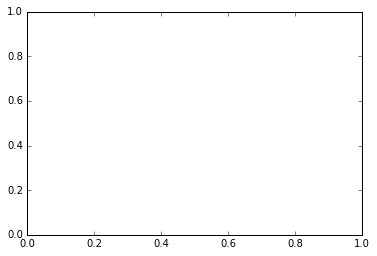

In [86]:
ax = plt.subplot(111)
vals = metrics.roc_curve(data.admit, prestige_predict)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(data.admit, gpa_predict)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction of prestige and gpa', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))